x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
[9]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 32)        2432      
_________________________________________________________________
activation (Activation)      (None, 16, 16, 32)        0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 8, 8, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 2, 32)          25632     
_________________________________________________________________
activation_1 (Activation)    (None, 2, 2, 32)          0         
_____________________________________________

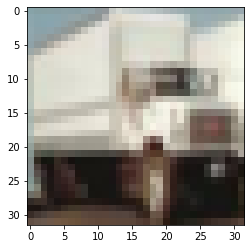

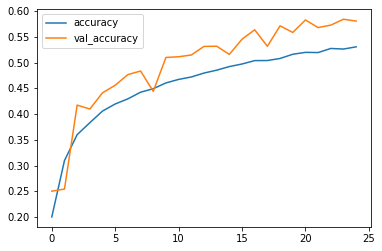

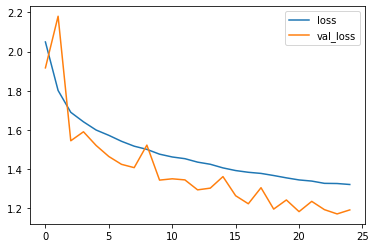

In [1]:
# Lenet-5 CNN testing and implementation.


from __future__ import print_function
import pandas as pd
import keras
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras.models import load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D

import matplotlib.pyplot as plt

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

## Each image is a 32 x 32 x 3 numpy array
x_train[444].shape

## Let's look at one of the images

print(y_train[444])
plt.imshow(x_train[444]);

num_classes = 10

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)


# now instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position
y_train[444]

# As before, let's make everything float and scale
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))


## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(AveragePooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))


## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(AveragePooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(120))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(84))
model_1.add(Activation('relu'))
model_1.add(Dense(10))
model_1.add(Activation('relu'))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

batch_size = 32

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0005, decay=1e-6)

# Let's train the model using RMSprop
model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=25,
              validation_data=(x_test, y_test),
              shuffle=True)

## Saves the model
model_1.save('Model.h5')

# Model Evaluation

evaluation = pd.DataFrame(model_1.history.history)

evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()



model_1 = load_model('Model.h5')